In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [27]:
# root = '/Users/julianalverio/code/hrl/hindsight_experience_replay/vds_logs'
root = '/Users/julianalverio/Desktop/data/'

In [53]:
def interpolate_single_df(df, missing_timesteps):
    new_rows = dict()
    for timestep_target in missing_timesteps:
        for idx in range(df.shape[0]):
            # first case, the target timestep is before your first timestep
            if idx == 0 and df.iloc[idx]['Step'] > timestep_target:
                slope = (df.iloc[1]['Value'] - df.iloc[0]['Value']) / (df.iloc[1]['Step'] - df.iloc[0]['Step'])
                new_value = df.iloc[0]['Value'] - slope * (df.iloc[0]['Step'] - timestep_target)
                break
            # last case, the target timestep is after your last timestep
            elif idx == (df.shape[0] - 1) and df.iloc[idx]['Step'] < timestep_target:
                slope = (df.iloc[-1]['Value'] - df.iloc[-2]['Value']) / (df.iloc[-1]['Step'] - df.iloc[-2]['Step'])
                new_value = df.iloc[-1]['Value'] + slope * (timestep_target - df.iloc[-1]['Step'])
                break
            # normal case, you have timesteps before and after
            elif idx != df.shape[0] and df.iloc[idx]['Step'] < timestep_target and df.iloc[idx+1]['Step'] > timestep_target:
                distance_from_upper = df.iloc[idx+1]['Step'] - timestep_target
                distance_from_lower = timestep_target - df.iloc[idx]['Step']
                upper_weight = 1. - distance_from_upper/(distance_from_upper + distance_from_lower)
                lower_weight = 1. - upper_weight
                new_value = upper_weight * df.iloc[idx+1]['Value'] + lower_weight * df.iloc[idx]['Value']
                break
        new_rows[timestep_target] = new_value
    
    new_rows_df = pd.DataFrame(new_rows.items(), columns=['Step', 'Value'])
    df = df[['Step', 'Value']]
    big_df = pd.concat([df, new_rows_df], axis=0)
    big_df = big_df.sort_values(by='Step')
    return big_df
            
            

In [49]:
def linearly_interpolate(all_dfs):
    x_steps = [df['Step'] for df in all_dfs]
    unique_timesteps = np.unique(np.concatenate(x_steps, axis=0))
    unique_timesteps = set(unique_timesteps)
    new_dfs = list()
    for df in all_dfs:
        df_timesteps = set(df['Step'])
        missing_timesteps = unique_timesteps - df_timesteps
        print(f'{len(missing_timesteps)} missing steps')
        interpolated_df = interpolate_single_df(df, missing_timesteps)

        if not np.all(interpolated_df['Step'] == sorted(list(unique_timesteps))):
            breakpoint()
        
        new_dfs.append(interpolated_df)
    values = [new_df['Value'] for new_df in new_dfs]
    x_data = sorted(list(unique_timesteps))
    y_data = np.array(values)
    return x_data, y_data


In [50]:
def plot_single(target):
    print(target)
    plt.ylim([0, 1.05])
    full_root = os.path.join(root, target)
    all_dfs = list()
    for idx, filename in enumerate(os.listdir(full_root)):
        if not filename.endswith('.csv'):
            continue
        full_path = os.path.join(full_root, filename)
        df = pd.read_csv(full_path)
        df = df[df['Step'] <= 500000]
        all_dfs.append(df)
    x_data, y_data = linearly_interpolate(all_dfs)
    std_data = y_data.std(axis=0)
    avg_data = y_data.mean(axis=0)
    upper = avg_data + std_data
    lower = avg_data - std_data
    label = target.split('/')[0]
    plt.plot(x_data, avg_data, label=label)
    plt.fill_between(x_data, upper, lower, alpha=0.2)
    plt.xlabel('Timesteps')
    plt.ylabel('Success Rate')
    plt.title(target.split('/')[-1].split('_')[-1])
    plt.legend()

In [51]:
def plot(targets):
    assert isinstance(targets, list), 'Input must be a list!'
    for target in targets:
        plot_single(target)

MEGA/MEGA_2U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ours/2U5
8 missing steps
8 missing steps
8 missing steps
0 missing steps
8 missing steps
8 missing steps
VDS/vds_2U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


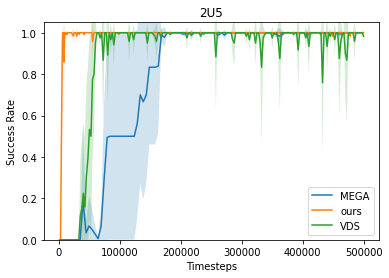

In [32]:
targets = ['MEGA/MEGA_2U5', 'Ours/2U5', 'VDS/vds_2U5']
plot(targets)

MEGA/MEGA_3U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ours/3U5
164 missing steps
164 missing steps
164 missing steps
0 missing steps
163 missing steps
164 missing steps
VDS/vds_3U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


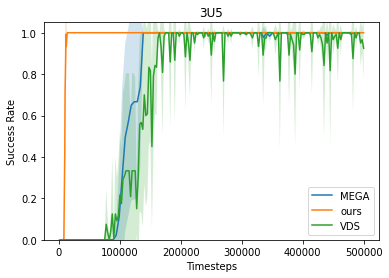

In [33]:
targets = ['MEGA/MEGA_3U5', 'Ours/3U5', 'VDS/vds_3U5']
plot(targets)

MEGA/MEGA_4U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ours/4U5
163 missing steps
0 missing steps
163 missing steps
154 missing steps
163 missing steps
162 missing steps
VDS/vds_4U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


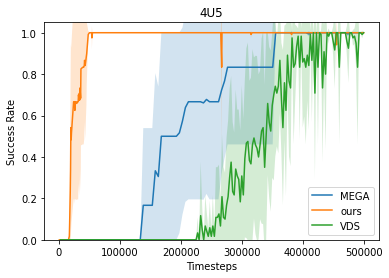

In [34]:
targets = ['MEGA/MEGA_4U5', 'Ours/4U5', 'VDS/vds_4U5']
plot(targets)

MEGA/MEGA_5U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ours/5U5
37 missing steps
18 missing steps
12 missing steps
12 missing steps
5 missing steps
0 missing steps
VDS/vds_5U5
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


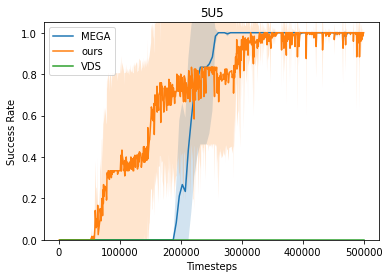

In [35]:
targets = ['MEGA/MEGA_5U5', 'Ours/5U5', 'VDS/vds_5U5']
plot(targets)

MEGA/MEGA_6x5E
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ours/6x5E
769 missing steps
116 missing steps
769 missing steps
769 missing steps
769 missing steps
769 missing steps
VDS/vds_6x5E
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


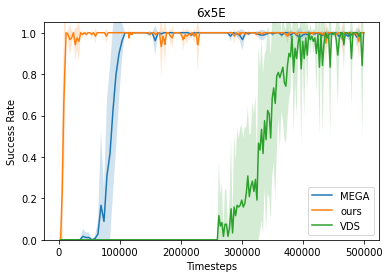

In [54]:
targets = ['MEGA/MEGA_6x5E', 'Ours/6x5E', 'VDS/vds_6x5E']
plot(targets)

MEGA/MEGA_8x5E
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ours/8x5E
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
VDS/vds_8x5E
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


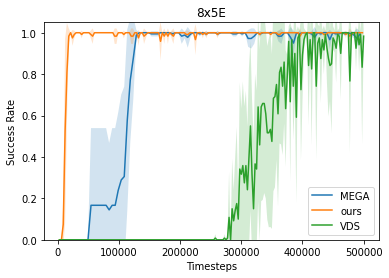

In [56]:
targets = ['MEGA/MEGA_8x5E', 'Ours/8x5E', 'VDS/vds_8x5E']
plot(targets)

MEGA/MEGA_10x5E
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ours/10x5E
34 missing steps
34 missing steps
19 missing steps
24 missing steps
27 missing steps
0 missing steps
VDS/vds_10x5E
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


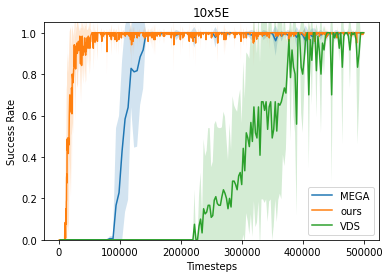

In [57]:
targets = ['MEGA/MEGA_10x5E', 'Ours/10x5E', 'VDS/vds_10x5E']
plot(targets)

MEGA/MEGA_12x12Block
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
Ours/12x12Block
17 missing steps
39 missing steps
23 missing steps
0 missing steps
7 missing steps
20 missing steps
VDS/vds_12x12Block
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


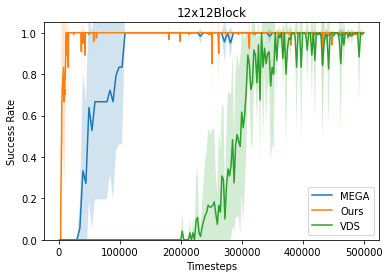

In [58]:
targets = ['MEGA/MEGA_12x12Block', 'Ours/12x12Block', 'VDS/vds_12x12Block']
plot(targets)

# Ablations Below!!

In [107]:
def plot_single_ablation_num_updates(target):
    print(target)
    plt.ylim([-0.05, 1.05])
    full_root = os.path.join(root, target)
    all_dfs = list()
    for idx, filename in enumerate(os.listdir(full_root)):
        if not filename.endswith('.csv'):
            continue
        full_path = os.path.join(full_root, filename)
        df = pd.read_csv(full_path)
        df = df[df['Step'] <= 100000]
        all_dfs.append(df)
    x_data, y_data = linearly_interpolate(all_dfs)
    std_data = y_data.std(axis=0)
    avg_data = y_data.mean(axis=0)
    upper = avg_data + std_data
    lower = avg_data - std_data
    label = target.split('/')[1]
    plt.plot(x_data, avg_data, label=label, linewidth=1.0)
#     plt.fill_between(x_data, upper, lower, alpha=0.2)
    plt.xlabel('Timesteps')
    plt.ylabel('Success Rate')
#     plt.title(target.split('/')[-1].split('_')[-1])
    plt.legend(loc='uppe')

In [108]:
def plot_ablations(targets):
    assert isinstance(targets, list), 'Input must be a list!'
    for target in targets:
        plot_single_ablation(target)

ablations/0 updates
0 missing steps
22 missing steps
22 missing steps
22 missing steps
4 missing steps
22 missing steps
ablations/1 update
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/3 updates
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/5 updates
5 missing steps
5 missing steps
5 missing steps
0 missing steps
5 missing steps
0 missing steps
ablations/8 updates
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


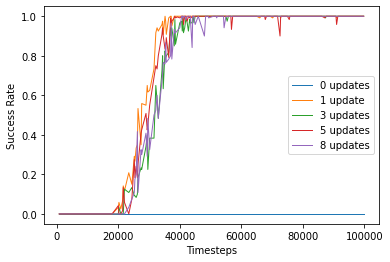

In [109]:
targets = ['ablations/0 updates', 'ablations/1 update', 'ablations/3 updates', 'ablations/5 updates', 'ablations/8 updates']
plot_ablations(targets)

In [110]:
def plot_single_ablation_vary_sigma(target):
    print(target)
    plt.ylim([-0.05, 1.05])
    full_root = os.path.join(root, target)
    all_dfs = list()
    for idx, filename in enumerate(os.listdir(full_root)):
        if not filename.endswith('.csv'):
            continue
        full_path = os.path.join(full_root, filename)
        df = pd.read_csv(full_path)
        df = df[df['Step'] <= 100000]
        all_dfs.append(df)
    x_data, y_data = linearly_interpolate(all_dfs)
    std_data = y_data.std(axis=0)
    avg_data = y_data.mean(axis=0)
    upper = avg_data + std_data
    lower = avg_data - std_data
    label = target.split('/')[1]
    plt.plot(x_data, avg_data, label=label, linewidth=1.0)
#     plt.fill_between(x_data, upper, lower, alpha=0.2)
    plt.xlabel('Timesteps')
    plt.ylabel('Success Rate')
#     plt.title(target.split('/')[-1].split('_')[-1])
    plt.legend(loc='center right')

In [111]:
def plot_ablations_vary_sigma(targets):
    assert isinstance(targets, list), 'Input must be a list!'
    for target in targets:
        plot_single_ablation_vary_sigma(target)

ablations/sigma=0.001
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/sigma=0.01
5 missing steps
5 missing steps
5 missing steps
0 missing steps
5 missing steps
0 missing steps
ablations/sigma=0.05
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/sigma=0.1
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/sigma=inf
0 missing steps
22 missing steps
22 missing steps
22 missing steps
4 missing steps
22 missing steps
ablations/Top 1
0 missing steps
22 missing steps
22 missing steps
22 missing steps
4 missing steps
22 missing steps


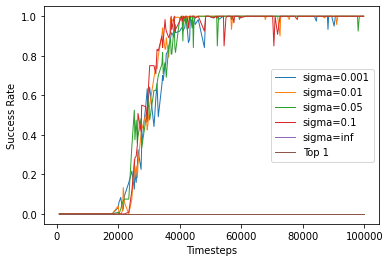

In [117]:
targets = ['ablations/sigma=0.001', 'ablations/sigma=0.01', 'ablations/sigma=0.05', 'ablations/sigma=0.1', 'ablations/sigma=inf', 'ablations/Top 1']
plot_ablations_vary_sigma(targets)

In [143]:
def plot_single_ablation_add_noise(target):
    print(target)
    plt.ylim([-0.05, 1.05])
    full_root = os.path.join(root, target)
    all_dfs = list()
    for idx, filename in enumerate(os.listdir(full_root)):
        if not filename.endswith('.csv'):
            continue
        full_path = os.path.join(full_root, filename)
        df = pd.read_csv(full_path)
        df = df[df['Step'] <= 100000]
        all_dfs.append(df)
    x_data, y_data = linearly_interpolate(all_dfs)
    std_data = y_data.std(axis=0)
    avg_data = y_data.mean(axis=0)
    upper = avg_data + std_data
    lower = avg_data - std_data
    label = target.split('/')[1]
    plt.plot(x_data, avg_data, label=label, linewidth=1.0)
#     plt.fill_between(x_data, upper, lower, alpha=0.2)
    plt.xlabel('Timesteps')
    plt.ylabel('Success Rate')
#     plt.title(target.split('/')[-1].split('_')[-1])
    plt.legend(loc='center right')

In [144]:
def plot_ablations_add_noise(targets):
    assert isinstance(targets, list), 'Input must be a list!'
    for target in targets:
        plot_single_ablation_add_noise(target)

ablations/noise sigma=0.0
5 missing steps
5 missing steps
5 missing steps
0 missing steps
5 missing steps
0 missing steps
ablations/noise sigma=0.01
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/noise sigma=0.1
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/noise sigma=0.3
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


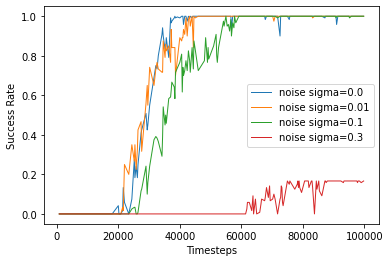

In [145]:
targets = ['ablations/noise sigma=0.0', 'ablations/noise sigma=0.01', 'ablations/noise sigma=0.1', 'ablations/noise sigma=0.3']
plot_ablations_add_noise(targets)

In [136]:
def plot_single_ablation_vary_Q_head(target):
    print(target)
    plt.ylim([-0.05, 1.05])
    full_root = os.path.join(root, target)
    all_dfs = list()
    for idx, filename in enumerate(os.listdir(full_root)):
        if not filename.endswith('.csv'):
            continue
        full_path = os.path.join(full_root, filename)
        df = pd.read_csv(full_path)
        df = df[df['Step'] <= 250000]
        all_dfs.append(df)
    x_data, y_data = linearly_interpolate(all_dfs)
    std_data = y_data.std(axis=0)
    avg_data = y_data.mean(axis=0)
    upper = avg_data + std_data
    lower = avg_data - std_data
    label = target.split('/')[1]
    plt.plot(x_data, avg_data, label=label, linewidth=1.0)
    plt.fill_between(x_data, upper, lower, alpha=0.2)
    plt.xlabel('Timesteps')
    plt.ylabel('Success Rate')
#     plt.title(target.split('/')[-1].split('_')[-1])
    plt.legend(loc='lower right')

In [137]:
def plot_ablations_vary_Q_head(targets):
    assert isinstance(targets, list), 'Input must be a list!'
    for target in targets:
        plot_single_ablation_vary_Q_head(target)

ablations/15 Q updates
84 missing steps
84 missing steps
84 missing steps
0 missing steps
84 missing steps
84 missing steps
ablations/1 Q update
11 missing steps
12 missing steps
12 missing steps
0 missing steps
12 missing steps
0 missing steps
ablations/Q uncertainty
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
ablations/MEGA
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps
0 missing steps


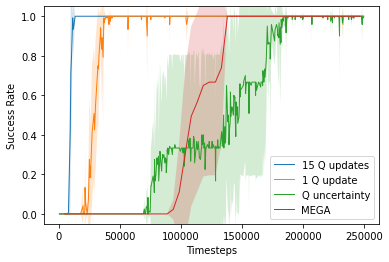

In [139]:
targets = ['ablations/15 Q updates', 'ablations/1 Q update', 'ablations/Q uncertainty', 'ablations/MEGA']
plot_ablations_vary_Q_head(targets)

In [164]:
def plot_single_heatmap(target):
    print(target)
    plt.ylim([-0.05, 1.05])
    full_root = os.path.join(root, target)
    all_dfs = list()
    for idx, filename in enumerate(os.listdir(full_root)):
        if not filename.endswith('.csv'):
            continue
        full_path = os.path.join(full_root, filename)
        df = pd.read_csv(full_path)
        df = df[df['Step'] <= 60000]
        all_dfs.append(df)
    x_data, y_data = linearly_interpolate(all_dfs)
    std_data = y_data.std(axis=0)
    avg_data = y_data.mean(axis=0)
    upper = avg_data + std_data
    lower = avg_data - std_data
    label = target.split('/')[1]
    plt.plot(x_data, avg_data, label=label, linewidth=1.0)
    plt.fill_between(x_data, upper, lower, alpha=0.2)
    plt.xlabel('Timesteps')
    plt.ylabel('Success Rate')
#     plt.title(target.split('/')[-1].split('_')[-1])
#     plt.legend(loc='lower right')

In [165]:
def plot_heatmaps(targets):
    assert isinstance(targets, list), 'Input must be a list!'
    for target in targets:
        plot_single_heatmap(target)

heatmaps/4U5
0 missing steps


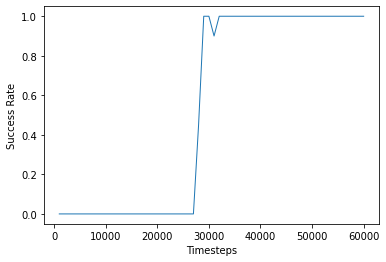

In [166]:
targets = ['heatmaps/4U5']
plot_heatmaps(targets)

# OLD STUFF BELOW!

In [ ]:
# def plot_single(path, tag='eval_success_rate', title='', idxs=None, shorten=False):
#     plt.ylim([0, 1])
#     full_path = os.path.join(root, path, 'npy', f'{tag}.npy')
#     data = np.load(full_path)
#     if shorten:
#         data = data[:160, :]
#     x_values = data[:, 0]
#     data = data[:, 1:]
#     if idxs is not None:
#         data = data[:, idxs]
#     if x_values.max() <= 400:
#         x_values *= 2500
#     if x_values.max() == 500000:
#         x_values /= 100000
#         xlabel = 'Timesteps (1e5)'
#     else:
#         x_values /= 1000000
#         xlabel = 'Timesteps (1e6)'
#     mean = np.nanmean(data, axis=1)
#     std = np.nanstd(data, axis=1)
# #     upper = mean + std * 1.96
# #     lower = mean - std * 1.96
#     upper = mean + std  # only plot 1 std not a full 95% confidence interval
#     lower = mean - std
#     plt.plot(x_values, mean, label=path)
#     plt.fill_between(x_values, upper, lower, alpha=0.2)
#     plt.xlabel(xlabel)
#     plt.ylabel(tag)

#     plt.title(title)
#     plt.legend(loc='upper left')
    

In [ ]:
# def plot_all_lines(path, tag='eval_success_rate', title='', idxs=[]):
#     assert idxs, 'YOU DIDNT PASS ANY IDXS'
#     plt.ylim([0, 1])
#     full_path = os.path.join(root, path, 'npy', f'{tag}.npy')
#     data = np.load(full_path)
#     x_values = data[:, 0]
#     data = data[:, 1:]
#     if x_values.max() <= 400:
#         x_values *= 2500
#     if x_values.max() == 500000:
#         x_values /= 100000
#         xlabel = 'Timesteps (1e5)'
#     else:
#         x_values /= 1000000
#         xlabel = 'Timesteps (1e6)'
#     for idx in idxs:
#         plt.plot(x_values, data[:, idx])
#     plt.xlabel(xlabel)
#     plt.ylabel(tag)

#     plt.title(title)
#     plt.legend()
    

In [ ]:
def plot_csv(path):
    plt.ylim([0, 1])
    childen = os.listdir(path)
    good_children = list()
    for child in children:
        if any(['progress.csv' == subchild for subchild in os.listdir(child)]):
            good_children.append(child)
    paths = list()
    for child in good_children:
        paths.append(os.path.join(path, good_child, 'progress.csv'))
    for csv_path in paths:
        df = pd.read_csv(csv_path)

    full_path = os.path.join(root, path, 'npy', f'{tag}.npy')
    data = np.load(full_path)
    if shorten:
        data = data[:160, :]
    x_values = data[:, 0]
    data = data[:, 1:]
    if idxs is not None:
        data = data[:, idxs]
    if x_values.max() <= 400:
        x_values *= 2500
    if x_values.max() == 500000:
        x_values /= 100000
        xlabel = 'Timesteps (1e5)'
    else:
        x_values /= 1000000
        xlabel = 'Timesteps (1e6)'
    mean = np.nanmean(data, axis=1)
    std = np.nanstd(data, axis=1)
#     upper = mean + std * 1.96
#     lower = mean - std * 1.96
    upper = mean + std  # only plot 1 std not a full 95% confidence interval
    lower = mean - std
    plt.plot(x_values, mean, label=path)
    plt.fill_between(x_values, upper, lower, alpha=0.2)
    plt.xlabel(xlabel)
    plt.ylabel(tag)

    plt.title(title)
    plt.legend(loc='lower right')
    

In [ ]:
def plot(paths, shorten=False, idxs=None):
    plt.figure(figsize=(8, 6))
    if isinstance(paths, str):
        paths = [paths]
    if not idxs:
        idxs = [None for _ in paths]
    for idx_arr, path in zip(idxs, paths):
        plot_single(path, shorten=shorten, idxs=idx_arr)

In [ ]:
# plot(['tmp_exp263_FetchPickAndPlace-v1_q3_replaynoise1_freq5_q3int0ext_qlossint_queryint_vds1', 'tmp_exp267_FetchPickAndPlace-v1_q3_replaynoise1_freq10_q3int0ext_qlossint_queryint_vds1', 'tmp_exp271_FetchPickAndPlace-v1_q3_replaynoise1_freq20_q3int0ext_qlossint_queryint_vds1/'])
plot(['tmp_exp267_FetchPickAndPlace-v1_q3_replaynoise1_freq10_q3int0ext_qlossint_queryint_vds1', 'tmp_exp271_FetchPickAndPlace-v1_q3_replaynoise1_freq20_q3int0ext_qlossint_queryint_vds1/'])




In [ ]:
plot(['3u5_base_noprune', '3u5_base_0.2prune', '3u5_base_0.1prune', '3u5_base_0.05prune'])

In [ ]:
plot(['3u5pruneR0.1', 'tmp_early'])

In [ ]:
plot(['3u5pruneR0.1', 'tmp_pruneR0.05'])

In [ ]:
plot(['3u5pruneR0.1', 'tmp_batch128', 'tmp_batch512'])

In [ ]:
plot(['3u5pruneR0.1', '3u5_VDSINTROSPECT'])

In [ ]:
plot(['tmp_3u5prune', 'tmp_3u5_vdsbaseline'])

In [ ]:
plot(['tmp_3u5prune', '3u5_base_save'])

In [ ]:
plot(['3u5_thresh0.25'])

In [ ]:
plot(['3u5_base_save'])

In [ ]:
plot(['3u5_base_save', 'threshmult0.8', 'threshmult1.0', 'threshmult1.2', 'threshmult2.0', 'threshmult3.0', 'threshmult4.0'])


In [ ]:
plot(['3u5_fsv1_thresh40'])

In [ ]:
plot(['3u5_thresh0.15', '3u5_thresh0.25', '3u5_thresh0.35', '3u5_thresh0.35', '3u5_thresh0.45', '3u5_thresh0.65', '3u5_thresh0.75'])
# plot(['3u3_nofs', '3u3_thresh0.45', '3u3_thresh0.55', '3u3_thresh0.65', '3u3_thresh0.75', '3u3_thresh0.85'])

In [ ]:
plot(['nofs_3u5', '3u5_thresh0.15', '3u5_thresh0.35'])

In [ ]:
plot(['3u3_nofs', '4u4_nofs'])

In [ ]:
plot(['3u3_nofs', '3u3_fsrand100k', '3u3_fsrand1k'])

In [ ]:
plot(['fsrand_3u10'])

In [ ]:
plot(['baselines/td3_vds_hand'])

In [ ]:
plot(['baselines/v2_td3_pick', 'baselines/v2_vds_pick', 'baselines/v2_her_pick', 'num_vds_critics/4critics_pick'])

In [ ]:
plot(['3qallinternal_frontierclip2'])

In [ ]:
plot(['3qallinternal/queryinternal_push_td3', '3qallinternal_returnclip99'])

In [ ]:
plot(['3qallinternal_avg0.0001L2', 'internalloss_with_L2/q3_allinternal_0.001L2'])

In [ ]:
plot(['3qallinternal_avgloss', '3qallinternal_avg0.01L2', '3qallinternal_avg0.001L2', '3qallinternal_avg0.0001L2', '3qallinternal_avg0.00001L2'])

In [ ]:
plot(['3qallinternal_random', '3qallinternal_random0.01L2', '3qallinternal_random0.001L2', '3qallinternal_random0.0001L2', '3qallinternal_random0.00001L2'])

In [ ]:
plot(['3qallinternal_random', 'q3_allinternal_0.0L2', '3qallinternal_optimistic'])

In [ ]:
plot(['3qallinternal_avgloss', '3qallinternal_random', '3qallinternal_worst', 'q3_allinternal_0.0L2', '3qallinternal_optimistic'])



In [ ]:
plot(['4qallinternal0.0001L2', 'internalloss_with_L2/q3_allinternal_0.001L2'])



In [ ]:
plot(['num_internal_critics/td3_q4_push', '4qallinternal0.01L2', '4qallinternal0.001L2', '4qallinternal0.0001L2', '4qallinternal0.00001L2', 'internalloss_with_L2/q3_allinternal_0.001L2'])



In [ ]:
plot_all_lines('q3_allinternal_0.0L2', idxs=[0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
plot_all_lines('internalloss_with_L2/q3_internalloss0.01L2', idxs=[0, 1, 2, 3, 4, 5, 7])

In [ ]:
plot(['q3_allinternal_0.0L2', 'q3_allinternal_lossscaling/q3_allinternal_lossscale0.5', 'q3_allinternal_lossscaling/q3_allinternal_lossscale0.8', 'q3_allinternal_lossscaling/q3_allinternal_lossscale0.9', 'q3_allinternal_lossscaling/q3_allinternal_lossscale1.1'])





In [ ]:
plot(['internalloss_with_L2/q3_allinternal_0.001L2', 'baselines/v0_vds_push'])

In [ ]:
plot(['q3_allinternal_0.0L2', 'internalloss_with_L2/q3_internalloss0.01L2', 'internalloss_with_L2/q3_allinternal_0.001L2', 'internalloss_with_L2/q3_allinternal_0.0001L2'], idxs=[[0, 1, 2, 4, 5, 6, 7], None, None, None])



In [ ]:
plot(['q3_allinternal_0.0L2', 'querying_internal_critics/queryinternal_push_td3'], idxs=[[0, 1, 2, 4, 5, 6, 7], None])

In [ ]:
plot(['q3_allinternal_0.0L2', 'num_internal_critics/td3_q3_push', 'querying_internal_critics/queryinternal_push_td3', 'baselines/v2_td3_push'])

In [ ]:
plot(['internalloss_with_L2/q3_internalloss0.01L2', 'num_internal_critics/td3_q3_push', 'baselines/v2_td3_push', 'querying_internal_critics/queryinternal_push_td3'], idxs=[[0, 1, 2, 3, 4, 5, 7], None, None, None])

In [ ]:
plot(['baselines/v2_td3_push_verification', 'baselines/v2_td3_push', 'td3_push_2verification'])

In [ ]:
plot(['baselines/v2_her_pick', 'baselines/v2_vds_pick', 'baselines/v2_td3_pick'])333

In [ ]:
plot(['actor_reg/noreg_push', 'baselines/v2_td3_push'])

In [ ]:
plot(['num_vds_critics/2critics_push', 'baselines/v2_td3_push', 'num_vds_critics/4critics_push'])

In [ ]:
plot(['externalcritic_actorloss/integratedexternal_push_td3', 'baselines/v2_td3_push'])

In [ ]:
plot(['ddpg_her_pick'])

In [ ]:
plot(['v2_td3_push', 'queryinternal_push_td3'])

In [ ]:
plot(['v2_td3_push', 'externalensemblesize2_push_td3'])

In [ ]:
plot(['v2_td3_maze', 'externalensemblesize2_maze_td3'])

In [ ]:
plot(['v0_vds_maze', 'v0_her_maze', 'v2_vds_maze', 'v2_td3_maze'], shorten=True)

# Do not touch the code below here!

In [ ]:
def plot_v0_data(path):
    data = pd.read_csv(path)
    x_values = data['Unnamed: 0'][:150] * 2500 / 100000
    data = data.drop(columns=['Unnamed: 0'])
    avg_data = np.array(data).mean(axis=1)[:150]
    plt.plot(x_values, avg_data)
plot_v0_data('/Users/julianalverio/code/hrl/hindsight_experience_replay/vds_logs/v0_her/csv/Eval Success Rate.csv')
plot_v0_data('/Users/julianalverio/code/hrl/hindsight_experience_replay/vds_logs/v0_vds/csv/Eval Success Rate.csv')
plt.legend()